Goal: Is there autocorrelation in the data?

Warning message in log(y):
“NaNs produced”


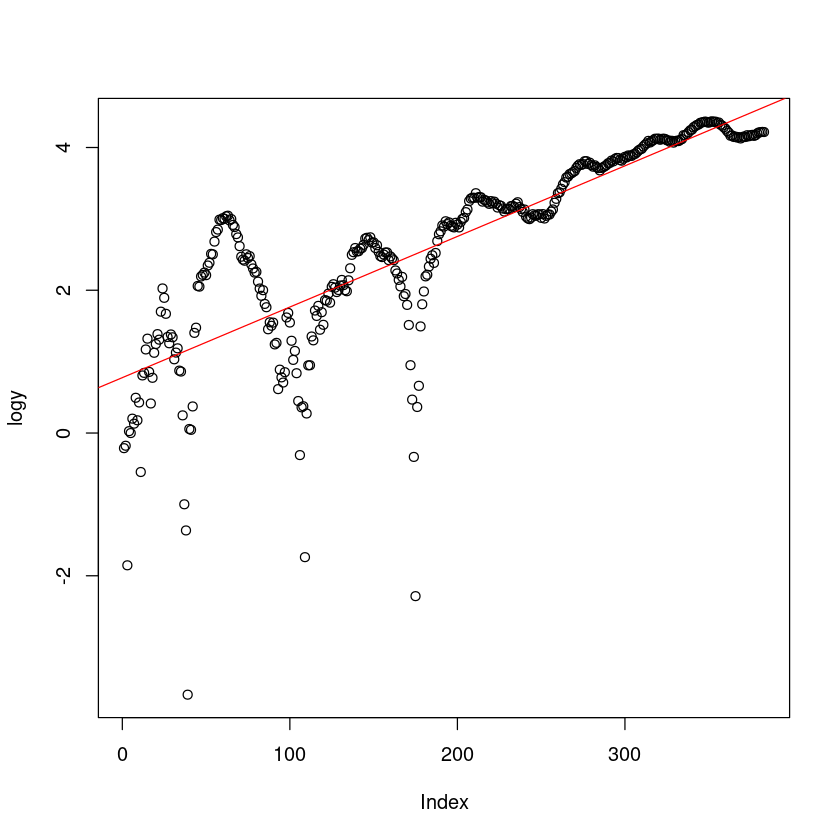

In [28]:
data <- read.csv("TimeSeriesSim.csv")
y = data[4:1000,]
logy = na.omit(log(y))
LEN = length(logy)
# Fit a line to the data
x = (1:LEN)
line = lm(formula=logy~x)
plot(logy)
# Add a regression line to the plot
abline(line, col = "red")

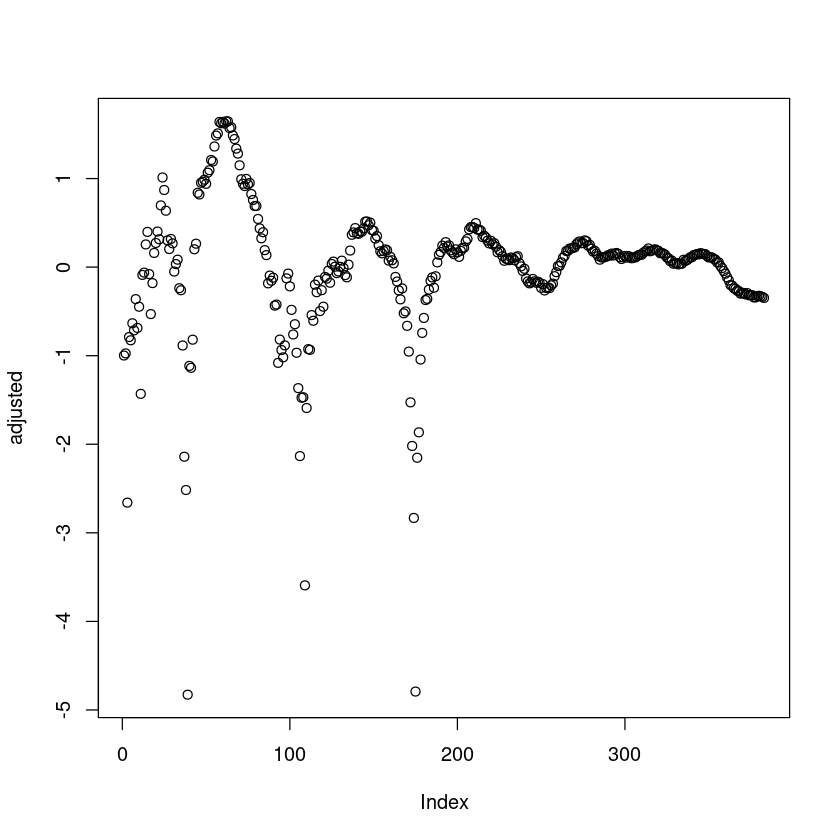

In [29]:
# Adjust data to be about the x-axis
trendline_vals <- predict(line)
adjusted = logy - trendline_vals
plot(adjusted)

In [11]:
cor(x[2:99], x[3:100])
cor(x[2:98], x[4:100])
cor(x[2:97], x[5:100])
cor(x[2:96], x[6:100])

[1] 0.4029252

[1] 0.03926995

[1] 0.01514799

[1] -0.09225238

Goal: Simulate a time series

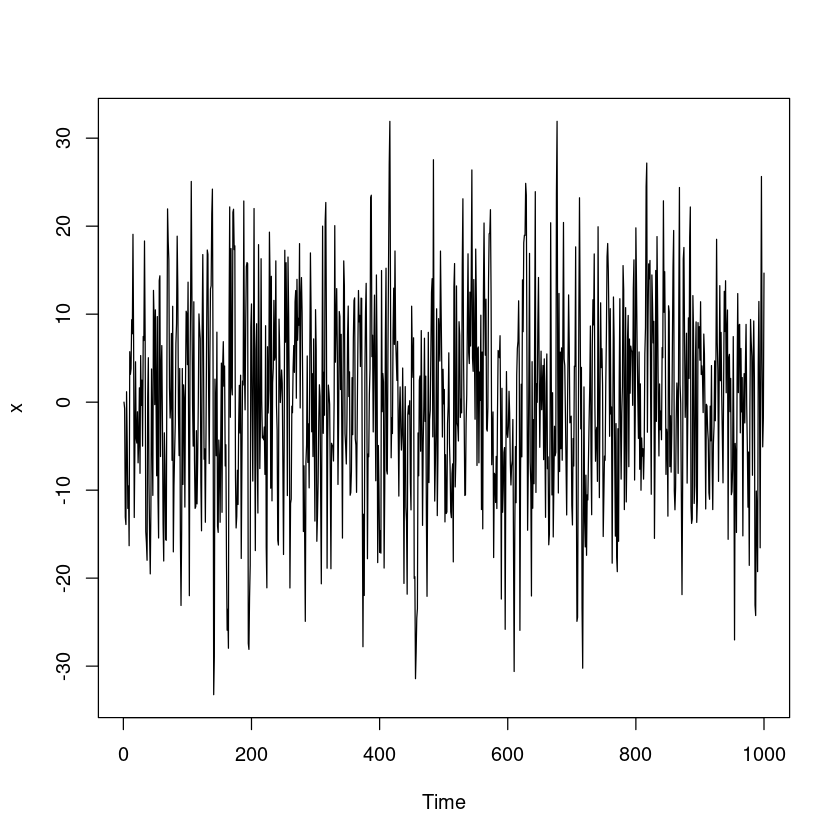

In [10]:
# ARMA11
x <- numeric(1000)
e <- rnorm(1000,0,10)
x[1] = 0
e[1] = rnorm(1)
for ( i in 2:1000){
    x[i] <- e[i] + .2*x[i-1] + .3*e[i-1]
    }
plot.ts(x)

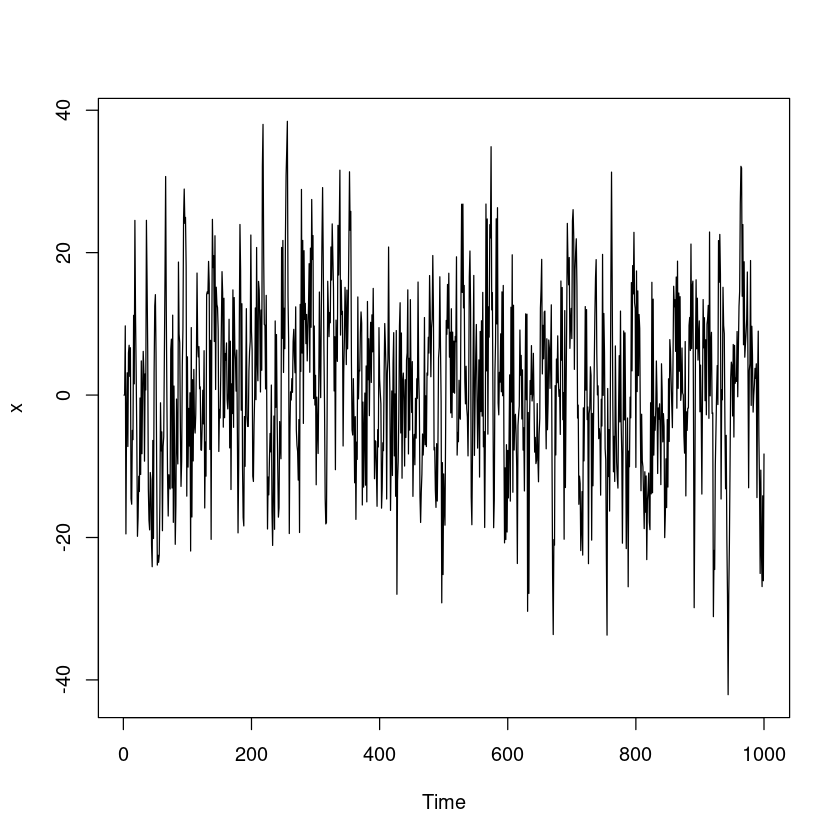

In [9]:
# ARMA22
x <- numeric(1000)
e <- rnorm(1000,0,10)
x[1] = 0
e[1] = rnorm(1)
for ( i in 3:1000){
    x[i] <- e[i] + .2*x[i-1] + .2*x[i-2] + .3*e[i-1] + .3*e[i-2]
    }
plot.ts(x)

In [12]:
?cor

cor {stats},R Documentation
x,"a numeric vector, matrix or data frame."
y,"NULL (default) or a vector, matrix or data frame with compatible dimensions to x. The default is equivalent to y = x (but more efficient)."
na.rm,logical. Should missing values be removed?
use,"an optional character string giving a method for computing covariances in the presence of missing values. This must be (an abbreviation of) one of the strings ""everything"", ""all.obs"", ""complete.obs"", ""na.or.complete"", or ""pairwise.complete.obs""."
method,"a character string indicating which correlation coefficient (or covariance) is to be computed. One of ""pearson"" (default), ""kendall"", or ""spearman"": can be abbreviated."
V,"symmetric numeric matrix, usually positive definite such as a covariance matrix."
